In [664]:
import csv                  #Importing all the packages needed
import sys
import pandas as pd
import pylab as pl
import numpy as np
import os
import nltk
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import matplotlib.pyplot as plt

In [665]:
root ='..\\data'                                      #Relative path where dataset is stored
stop_words = stopwords.words('english')               #Get all the english language stop words 
l = pd.read_csv(os.path.join(root,'listings.csv'))    #Get the dataset and store it in dataframe
r = pd.read_csv(os.path.join(root,'reviews.csv'))

In [666]:
myfile = open('analysis5.csv', 'w', encoding='utf-8')     #Create the csv file to show the output
wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
wr.writerow(('ListingId','Neighbourhood','SummaryByHost','CommentByVisitor','Similarity','Degree'))

86

In [667]:
def totalWords(sent):                                     #Function to remove stop words and numbers from sentences
    words=[]
    for word in re.sub("[^\w]", " ",  sent).split():
        if word.lower() not in stop_words and word.isalpha():
            words.append(word)
    return words

In [668]:
def getNeighbourhood(id):                                #Function to get neighbourhood name from listing id
    loc = l.loc[l['id']== id,'neighbourhood'].iloc[0]
    return loc

In [669]:
def listSummary(id):                                    #Function to get all words from summary removing stop words
    summary=l[l['id']== id].summary.tolist()
    words=totalWords(summary[0])
    return words

In [670]:
def listComment(id):                                    #Function to get all words from comments removing stop words
    words=[]
    comment=r[r['listing_id']== id].comments.tolist()
    if comment:
        words=totalWords(comment[0])
    return words

In [671]:
def match(summary,comment):                             #Match both the comment and summary to get the similarity
    match=[]
    for word in summary:
        for synset in wordnet.synsets(word):
            for lemma in synset.lemma_names():
                if lemma in comment:
                     match.append(lemma)
    return list(set(match))

In [672]:
r=r[r['comments'].notnull()]                            #Remove all the rows from dataset where there are no comment
l=l[l['summary'].notnull()]                             #Remove all the rows from dataset where there are no summary
similarity=0
for id in l['id']:                                      #Get all the listing ids which are present in both listings and reviews dataset
    if id in r['listing_id']: 
        location=getNeighbourhood(id)
        summary=listSummary(id)                         #Get all the summary words 
        comment=listComment(id)                         #Get all the comment words 
        degree=match(summary,comment)                   #Get the degree of similarity
        wr.writerow((id,location,summary,comment,degree,len(degree)))
         

In [726]:
output = pd.read_csv('analysis5.csv')

def getSimilarity(name):
    result=output[output['Neighbourhood']==name]
    meanValue=result['Degree'].mean()
    return meanValue

In [736]:
location=list(set(output['Neighbourhood']))
similarDegree=[]
for name in location:
     similarDegree.append(getSimilarity(name))

Chinatown
Dorchester
Back Bay
Allston-Brighton
Beacon Hill
Jamaica Plain
Roxbury
West End
Roslindale
Fenway/Kenmore
North End
[0.0, 3.5, 1.7142857142857142, 0.8, 1.5, 7.0, 1.0, 0.0, 2.0, 3.0, 3.0]


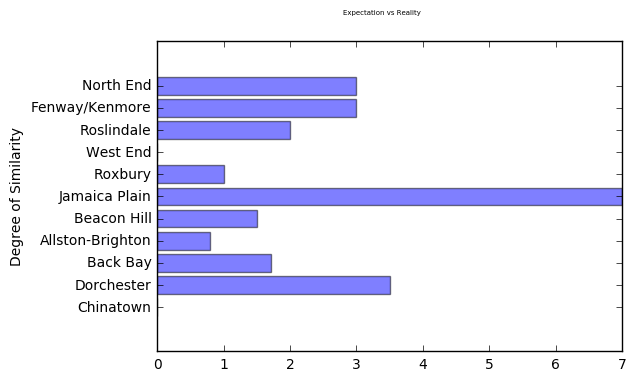

In [744]:
y_pos = np.arange(len(location))
plt.barh(y_pos, similarDegree, align='center', alpha=0.5)
plt.suptitle('Expectation vs Reality', fontsize=5)
plt.yticks(y_pos, location)
plt.ylabel('Degree of Similarity')
plt.show()
plt.savefig('analysis5.png')